# Ejercicios prácticos - Módulo 2

In [1]:
import arviz as az
import pymc as pm
import preliz as pz
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


### 1. Usando PyMC reproducí los resultados del primer capítulo para el problema de la moneda. Usá los 3 priors usados en ese capítulo Beta(1, 1), Beta(0.5, 0.5), Beta(20, 20). Probá con 4 experimentos y con 150. Presenta los resultados usando 2 visualizaciones.

Empiezo por generar muestras aleatorias de longitud 4 y 150 respectivamente considerando $\theta = 0.35$ como el valor real del parámetro:

In [74]:
theta_real = 0.35  

# Caso de 4 experimentos
experimentos_4 = 4
datos_4 = pz.Binomial(n=1, p=theta_real).rvs(size=experimentos_4, random_state=123)

# Caso de 150 experimentos
experimentos_150 = 150
datos_150 = pz.Binomial(n=1, p=theta_real).rvs(size=experimentos_150, random_state=123)

Defino una función útil que me ahorra de repetir código:

In [75]:
def comparar_modelos_4y150_segun_prior(alpha:float, beta:float):
    with pm.Model() as modelo_4:
        θ = pm.Beta("θ", alpha=alpha, beta=beta)  
        y = pm.Bernoulli("y", p=θ, observed=datos_4)  
        idata_4 = pm.sample()

    with pm.Model() as modelo_150:
        θ = pm.Beta("θ", alpha=alpha, beta=beta) 
        y = pm.Bernoulli("y", p=θ, observed=datos_150)  
        idata_150 = pm.sample()
        
    # Grafico comparativo de las 2 posteriors
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    az.plot_posterior(idata_4, var_names=["θ"], hdi_prob=0.95, ax=axs[0])
    az.plot_posterior(idata_150, var_names=["θ"], hdi_prob=0.95, ax=axs[1])

Tomo el prior Beta(1, 1) y comparo los resultados según cantidad de experimentos:

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


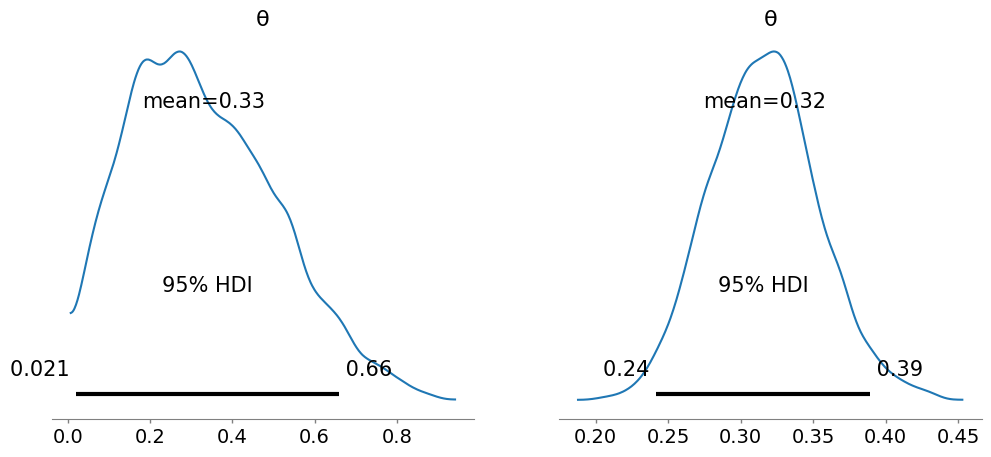

In [76]:
comparar_modelos_4y150_segun_prior(alpha=1, beta=1)  

Tomo el prior Beta(0.5, 0.5) y comparo los resultados según cantidad de experimentos:

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


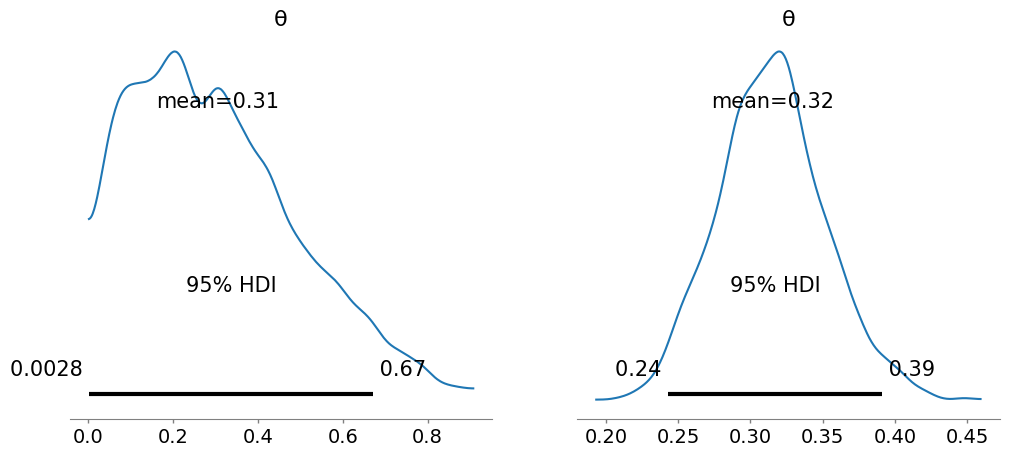

In [77]:
comparar_modelos_4y150_segun_prior(alpha=0.5, beta=0.5)  

Tomo el prior Beta(20, 20) y comparo los resultados según cantidad de experimentos:

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


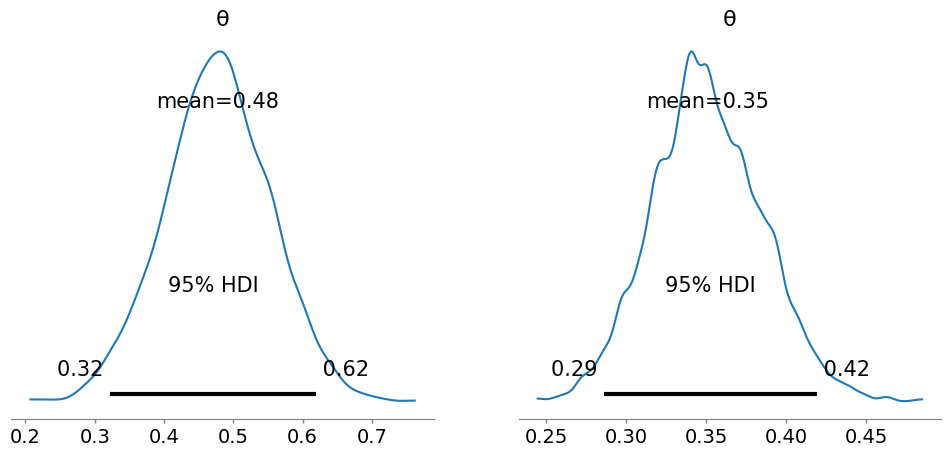

In [78]:
comparar_modelos_4y150_segun_prior(alpha=20, beta=20)  

### 2. En `nuestro_primer_modelo` reemplazá la distribución $\theta \sim Beta(1, 1)$ por una uniforme en el intervalo [0, 1] Cual es el efecto en el muestreo y en la distribución a posteriori? ¿Y si usas un intervalo más ámplio, como [-2, 1]?

Tenemos que `nuestro_primer_modelo` es el modelo resultante de tratar el caso de la moneda con 4 experimentos y el valor real del parámetro $\theta$ del inciso anterior. Probemos que ocurre cuando hacemos el cambio en el prior:

In [79]:
with pm.Model() as nuestro_primer_modelo:
    θ = pm.Uniform("θ", lower=0, upper=1)
    y = pm.Bernoulli("y", p=θ, observed= datos_4)  
    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


Podemos ver que no hubieron divergencias en el sampleo de la posterior y se hizo la estimación en un tiempo razonable. Ahora pasemos a ver el gráfico de la posterior:

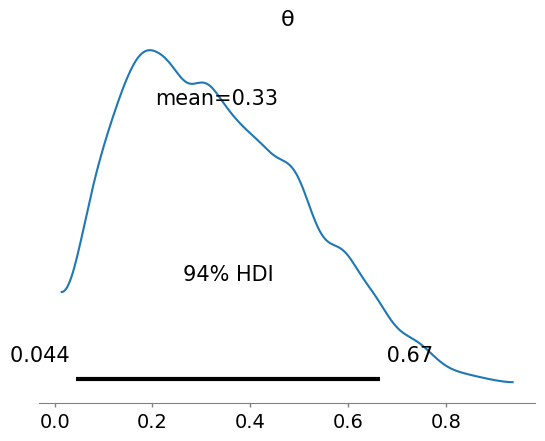

In [80]:
az.plot_posterior(idata);

Vemos que el gráfico es bastante similar al obtenido en la parte teórica de este episodio usando la distribución $Beta(1, 1)$ como prior. Ahora probemos con el rango $[-2, 1]$ en el prior uniforme:

In [81]:
with pm.Model() as nuestro_primer_modelo:
    θ = pm.Uniform("θ", lower=-2, upper=1)
    y = pm.Bernoulli("y", p=θ, observed= datos_4)  
    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
c:\Users\gerar\OneDrive\Documentos\Mis Archivos\Estadistica e Inferencia 2\EEI2_ejercicios\.venv\Lib\site-packages\pytensor\tensor\elemwise.py:710: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
There were 724 divergences after tuning. Increase `target_accept` or reparameterize.


Podemos ver que al considerar el rango de números negativos (el -2) empezaron a ocurrir muchas divergencias en las estimaciones de las 4 cadenas y esto ocurre porque cuando el sampler intenta explorar valores negativos de $\theta$, **la función de log-verosimilitud se vuelve indefinida o toma valores inválidos**.

Los algoritmos MCMC como NUTS (No-U-Turn Sampler) que usa PyMC funcionan navegando por el espacio de parámetros usando gradientes. Cuando el prior permite regiones donde la posterior no está bien definida, se crean:

* **Discontinuidades**: Saltos abruptos en la densidad de probabilidad
* **Gradientes infinitos**: Donde la derivada de la log-posterior diverge
* **Regiones de baja curvatura**: Donde el sampler tiene dificultades para orientarse

### 3. Los modelos de PyMC tienen un método `.to_graphviz()` que se puede utilizar para visualizar el modelo (también existe la función `pm.model_to_graphviz()`). Use este método para visualizar `nuestro_primer_modelo`. Compare el resultado con el diagrama de Kruschke.

Defino de vuelta a `nuestro_primer_modelo` para que tenga su prior original:

In [82]:
with pm.Model() as nuestro_primer_modelo:
    θ = pm.Beta("θ", alpha=1, beta=1)  
    y = pm.Bernoulli("y", p=θ, observed=datos_4)  

Ahora uso el método `.to_graphviz()`:

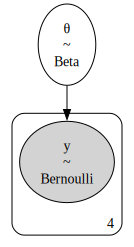

In [83]:
nuestro_primer_modelo.to_graphviz()

Podemos notar que la versión de diagramas para modelos ofrecidas por PyMC es más simplificada que los [diagramas de Kruschke](https://www.sumsar.net/blog/2013/10/diy-kruschke-style-diagrams/), por ejemplo podemos ver que no están las formas de las distribuciones.

### 4. En el modelo `comparación_grupos` que dimensión y tamaño tiene μ[idx] y σ[idx]? Justifique

Primero hay que reproducir al modelo `comparación_grupos` en este notebook:

In [84]:
tips = pd.read_csv("data/raw/propinas.csv")
categories = np.array(["Jue", "Vie", "Sab", "Dom"])
tip = tips["propina"].values
idx = pd.Categorical(tips["dia"], categories=categories).codes
coords = {"dias": categories, "dias_flat": categories[idx]}

with pm.Model(coords=coords) as comparing_groups:
    μ = pm.Normal('μ', mu=0, sigma=5, shape=4)
    σ = pm.HalfNormal('σ', sigma=1, shape=4)
    y = pm.Gamma("y", mu=μ[idx], sigma=σ[idx], observed=tip, dims="dias_flat")

Sin necesidad de samplear cadenas de markov podemos usar el atributo `.shape` de $\mu$ y $\sigma$:

In [85]:
μ[idx].shape, σ[idx].shape

(Shape.0, Shape.0)

Pero vemos sorpresivamente que.... ¿tiene dimensiones 0?. Lo que ocurre con las variables en PyMC es que son son `TensorVariable`, no arrays con valores y eso hace que estas representen operaciones matemáticas, no datos concretos. 

### 5. La Gaussiana es una distribución sin límites es decir es válida en el intervalo $(-\infty, \infty)$, en el modelo `comparación_grupos` usamos una Gama como likelihood, pero podríamos haber usado una Gaussiana? Cambiarías tu respuesta si las propinas tomaran valores alrededor de 100 dólares?

Hay que recordar que el caso de uso para el modelo `comparación_grupos` era estudiar la cantidad de propinas recibidas en un día de semana, **es decir que la variable que nos interesa estimar ($y$) toma valores solamente positivos**. Al considerar como likelihood a la distribución Gaussiana lo que ocurriría es que empezarían a ocurrir muchas divergencias en las estimaciones de las cadenas ya que se querría explorar espacios donde hay valores negativos (similar a lo que ocurría en el ejercicio 2). 

Verifiquemos si esto realmente ocurre:

In [86]:
with pm.Model(coords=coords) as comparing_groups:
    μ = pm.Normal('μ', mu=0, sigma=5, shape=4)
    σ = pm.HalfNormal('σ', sigma=1, shape=4)
    y = pm.Normal("y", mu=μ[idx], sigma=σ[idx], observed=tip, dims="dias_flat")

    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 216 seconds.


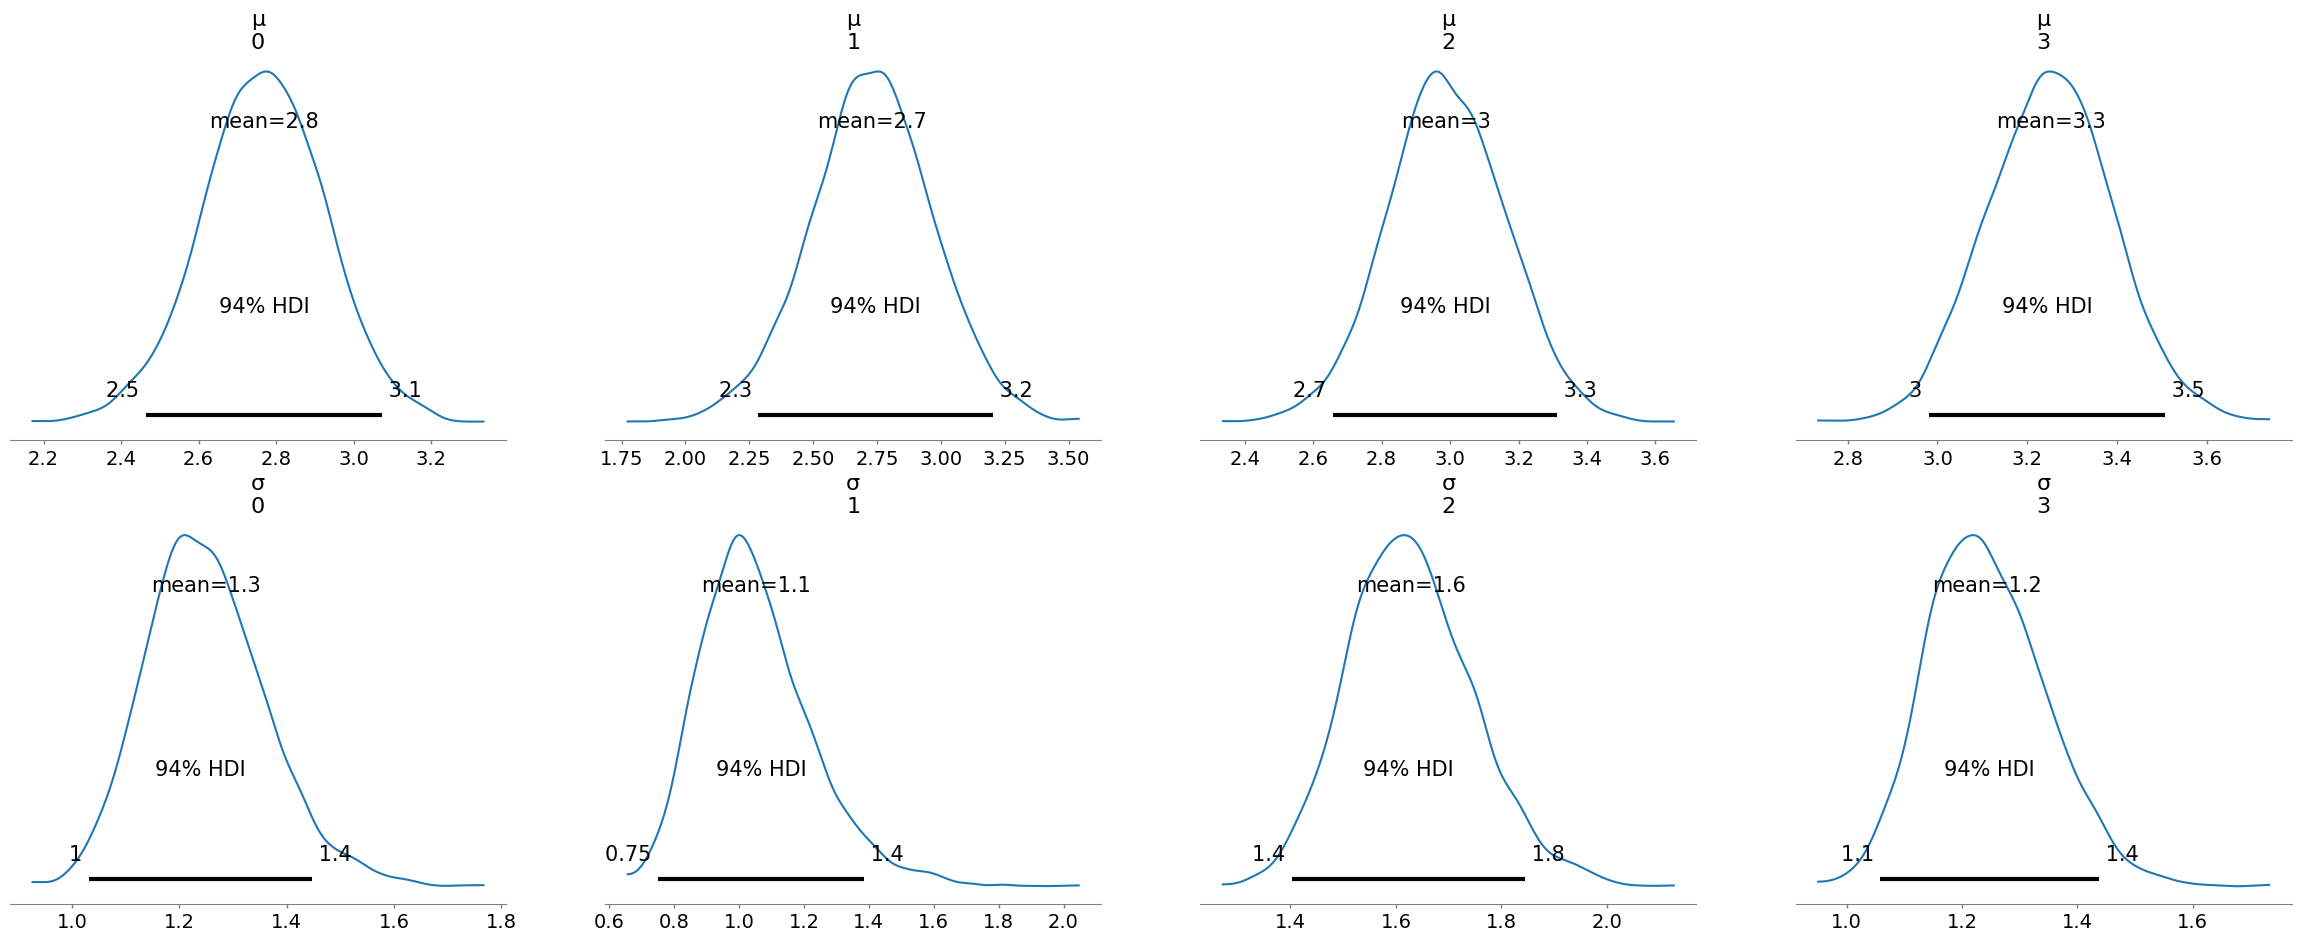

In [87]:
az.plot_posterior(idata, var_names=["μ", "σ"])
plt.show()

Podemos notar que a pesar de haber utilizado como likelihood a la distribución Gaussiana no hubieron problemas de divergencia como mencioné o como ocurría en ejercicios anteriores, de hecho obtuvimos una estimación similar a la mostrada en el episodio. Para tratar de darle un poco de sentido a esto podemos pensar en como funcionan los algoritmos de sampleo de posteriors basados en **MCMC**, más especificamente en el siguiente punto:

* **La cadena trata de explorar regiones de alta densidad (probabilidad)** 

Como tenemos una cantidad de datos no tan pequeña (244) y todos son positivos entonces se infiere que la mayor probabilidad de incidencia está con datos positivos y por lo tanto se exploran esas zonas. Además PyMC antes de hacer el sampleo "verdadero" **hace un sampleo previo en donde se descartan zonas inútiles** y que para nuestro caso podrían ser los valores negativos. 

Luego respondiendo a la última pregunta del enunciado: **si las propinas tomaran valores alrededor de 100 dólares ocurriría lo mismo que expliqué arriba, los valores negativos se descartarían en el sampleo inicial**.

### 6. Calculá la probabilidad de superioridad directamente a partir de las muestras de la distribución *a posteriori*, es decir sin la expresión analítica. Cómo se comparan los resultados con los valores obtenidos analíticamente.

Primero obtenemos las muestras de la posterior para $\mu$ y $\sigma$ separando por grupo:

In [88]:
mu_samples = idata.posterior["μ"].values.reshape(-1, 4)  # shape: (n_samples, n_dias)
sigma_samples = idata.posterior["σ"].values.reshape(-1, 4)

Y ahora definimos una función que calcula la probabilidad de superioridad de una forma empírica, más precisamente lo que esta función hace es:

* **Itera sobre cada muestra de la posterior**: Para cada conjunto de parámetros $\mu$ y $\sigma$ obtenidos del sampleo
* **Convierte parámetros**: Transforma $(\mu, \sigma)$ a formato $(\alpha, \beta)$ requerido por la distribución Gamma que usa Numpy
* **Hace un "gran sampleo"**: Genera 10,000 observaciones sintéticas de cada grupo usando sus parámetros respectivos
* **Comparación directa**: Cuenta cuántas veces una observación del grupo1 > grupo2, calculando la proporción empírica
* **Preserva incertidumbre**: Retorna un array con probabilidades para cada muestra posterior, manteniendo la variabilidad

Básicamente en lugar de la fórmula analítica, simula millones de comparaciones directas para estimar $P(X_1 > X_2)$ de forma puramente numérica. Pasemos a la definición:

In [89]:
def probabilidad_superioridad_numerica(grupo1_idx, grupo2_idx, n_simulations=10000):
    prob_superiores = []
    
    # Para cada muestra de la posterior
    for i in range(len(mu_samples)):
        mu1, sigma1 = mu_samples[i, grupo1_idx], sigma_samples[i, grupo1_idx]
        mu2, sigma2 = mu_samples[i, grupo2_idx], sigma_samples[i, grupo2_idx]
        
        # Hago la conversión de los parámetros a su versión gamma
        alpha1 = (mu1/sigma1)**2
        beta1 = mu1/(sigma1**2)
        alpha2 = (mu2/sigma2)**2  
        beta2 = mu2/(sigma2**2)
        
        # Genero muestras aleatorias
        grupo1_sim = np.random.gamma(alpha1, 1/beta1, n_simulations)
        grupo2_sim = np.random.gamma(alpha2, 1/beta2, n_simulations)
        
        # Calculo proporción donde grupo1 > grupo2
        prob_superior = np.mean(grupo1_sim > grupo2_sim)
        prob_superiores.append(prob_superior)
    
    return np.array(prob_superiores)

Finalmente comparamos todos los pares de días:

In [90]:
dias = ["Jue", "Vie", "Sab", "Dom"]
for i in range(4):
    for j in range(i+1, 4):
        prob_ij = probabilidad_superioridad_numerica(i, j)
        print(f"P({dias[i]} > {dias[j]}) = {np.mean(prob_ij):.3f}")

P(Jue > Vie) = 0.497
P(Jue > Sab) = 0.476
P(Jue > Dom) = 0.383
P(Vie > Sab) = 0.476
P(Vie > Dom) = 0.376
P(Sab > Dom) = 0.421


Podemos notar que la estimación de la probabilidad de superioridad de esta forma empírica **es bastante similar** (por no decir igual) a la que vimos en el episodio (forma analítica).

### 7. Aplicá al menos uno de los modelos vistos en este capítulo a datos propios o de tu interés.

En los últimos años se ha establecido la conversación sobre el aumento de precios de jugadores en el mundo del fútbol. Entre los casos más conocidos está [**el fichaje de Cristiano Ronaldo por el Real Madrid en el 2009**](https://www.espn.com.ar/futbol/espana/nota/_/id/7033500/a-11-anos-del-fichaje-de-cristiano-ronaldo-con-el-real-madrid) que en su momento fue **el fichaje más caro de la historia**. Para tomar dimensión de la situación hay que considerar que **Ronaldo Nazario** 12 años antes **[le había costado 28 millones de euros al Inter de Milán](https://www.ole.com.ar/futbol-internacional/ronaldo-brasil-pase-caro-historia_0_rkahIdTib.html)** y también fue el fichaje más caro de la historia para ese momento, sin embargo la diferencia entre los dos costos de fichaje es más que notoria.

Para aportar un poco a esta discusión **la idea es averiguar en que año fue que cambió la valoración media de los jugadores de fútbol y cúal era el valor para ambas épocas**: ¿fue algo progresivo?, ¿fue de un día para el otro?, ¿el Real Madrid arruinó al fútbol?. Para eso se va a utilizar un [conjunto de datos](https://www.kaggle.com/datasets/davidcariboo/player-scores?select=player_valuations.csv) que contiene la información que necesitamos. Al mismo se le aplicó un preprocesamiento en el script `player_valuations.py` para resumir los datos y considerar solo los promedios por cada año **en escala logarítmica**.

Sin más, procedemos a cargar los datos y visualizarlos:

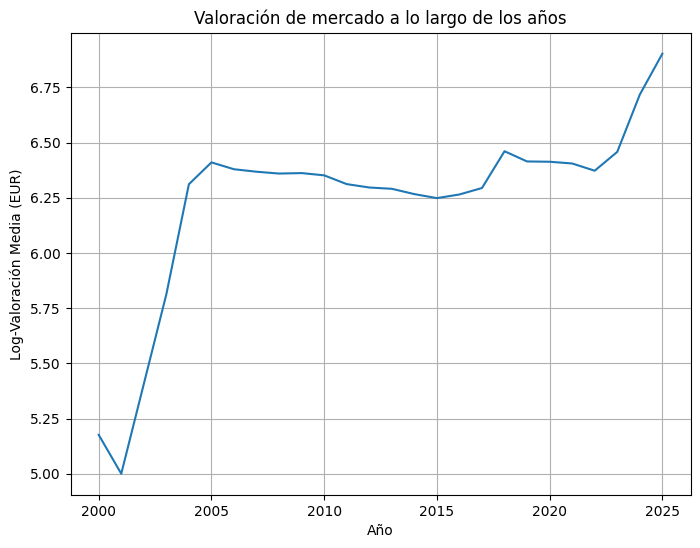

In [2]:
df_valoracion_jugadores = pd.read_csv("data/processed/player_valuations_log_mean.csv")

plt.figure(figsize=(8, 6))
plt.plot(df_valoracion_jugadores['year'], df_valoracion_jugadores['log_market_value_in_eur'])
plt.title("Valoración de mercado a lo largo de los años")
plt.xlabel("Año")
plt.ylabel("Log-Valoración Media (EUR)")
plt.grid()
plt.show()

Para modelar las valoraciones de los jugadores **se usará una distribución Gaussiana** por cuestiones de simplicidad y que a grandes rasgos lo que queremos estimar es un promedio. Como creemos que la valoración media de un jugador es distinta antes y despúes de cierto año se usarán dos valores de valoración media ($\mu_0$ y $\mu_1$). Además deberemos estimar el año de corte $(ac)$ que dividirá a los años para los cuales se considerará un promedio u otro.

\begin{equation}
log(\text{valoración media}) \sim \mathcal{N}(\mu, \sigma)
\end{equation}

\begin{equation}
\mu(año) = \begin{cases}
\mu_0, \text{si año} \le ac,\\
\mu_1, \text{si año} \gt ac
\end{cases}
\end{equation}

Los _a prioris_ que usaremos serán:

\begin{align}
\mu_0 \sim \mathcal{N}(5, 1) \\
\mu_1 \sim \mathcal{N}(5, 1) \\
ac \sim U(A_0, A_1)
\end{align}

Donde la distribución uniforme es discreta y $A_0$ y $A_1$ corresponden al primer y último año considerado en el análisis respectivamente. La elección de los valores para los priors de $\mu_0$ y $\mu_1$ viene dada porque estamos trabajando con valoraciones de mercados para jugadores de futbol y además estamos considerando a su exponente, **un jugador raramente (casi nunca) vale menos de 100.000 euros ($10^5$)**, luego las desviaciones toman valores de 1 porque se trabaja justamente en escala logaritmica **en donde un cambio unitario es un cambio de un orden de magnitud** y por ende no hay que considerar un valor tan alto.


Pasamos a plantear el modelo con toda esta información:

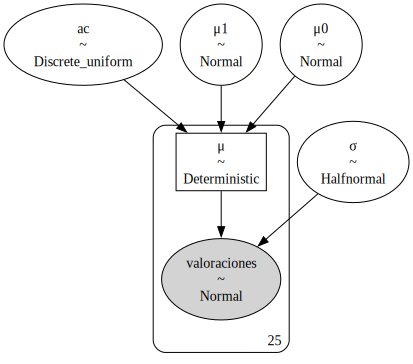

In [3]:
with pm.Model() as modelo_valoracion_jugadores:
    
    # Cualquier año tiene la misma chance de haber sido el 
    # del cambio
    ac = pm.DiscreteUniform("ac", 
                            lower=df_valoracion_jugadores['year'].values.min(),
                            upper=df_valoracion_jugadores['year'].values.max())
    
    # Priors para las valoraciones antes y después del cambio
    μ0 = pm.Normal("μ0", mu=5, sigma=1)  
    μ1 = pm.Normal("μ1", mu=5, sigma=1)

    # Desviación estándar para la observación
    σ = pm.HalfNormal("σ", sigma=1)  

    # Asignamos las valoraciones a los años de acuerdo a ac
    μ = pm.Deterministic("μ", 
                        pm.math.switch(df_valoracion_jugadores['year'].values <= ac, μ0, μ1))

    valoraciones = pm.Normal("valoraciones", 
                           mu=μ, 
                           sigma=σ,
                           observed=df_valoracion_jugadores['log_market_value_in_eur'].values)
    
modelo_valoracion_jugadores.to_graphviz()

Ahora tomamos samples de la posterior:

In [4]:
with modelo_valoracion_jugadores:
    idata_valoraciones = pm.sample(random_seed=1791)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [ac]
>NUTS: [μ0, μ1, σ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Graficamos a las posteriors de los parámetros de interés y algunas estadísticas varias:

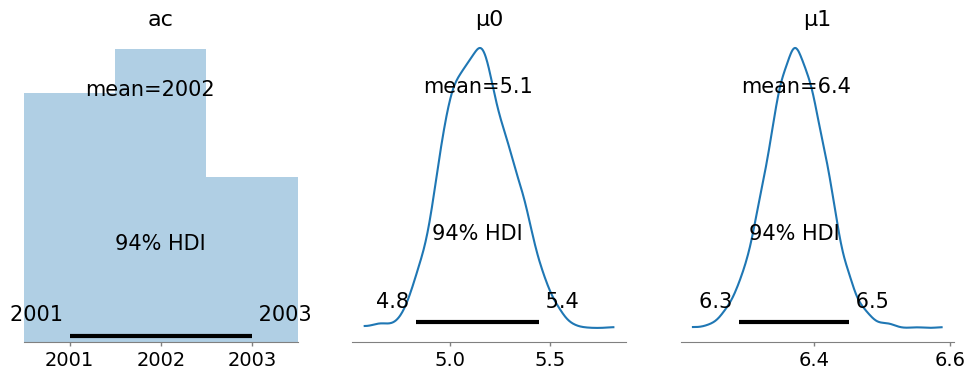

In [5]:
ax = az.plot_posterior(idata_valoraciones, var_names=["ac", "μ0", "μ1"], figsize=(12, 4));

In [6]:
az.summary(idata_valoraciones,kind="stats", var_names=["ac", "μ0", "μ1"])

,mean,sd,hdi_3%,hdi_97%
ac,2001.881,0.756,2001.000,2003.000
μ0,5.142,0.168,4.828,5.446
μ1,6.373,0.044,6.289,6.452


Podemos ver que según nuestro modelo **el año de cambio en la valoración fue el 2002** (si tomamos la estimación puntual), y que además la valoración media en escala logarítmica para los jugadores pasó de 5.1 a 6.4 entre periodos. Si "reconvertimos" los datos tendríamos que:

* Antes del 2002 un jugador promedio costaba 125.892 euros
* Despúes del 2002 un jugador promedio empezó a costar 2.511.886 euros (un gran cambio!)

Si le queremos dar un sentido histórico, tenemos que este punto de inflexión detectado coincide con la **política de fichajes multimillonarios del Real Madrid**, conocidos como [*los Galácticos*](https://en.wikipedia.org/wiki/Gal%C3%A1cticos?). Los movimientos más relevantes fueron:

* **Luis Figo (2000)**: Fichaje récord proveniente del Barcelona (\~€60–62 M).
* **Zinedine Zidane (2001)**: Otro fichaje récord (\~€73–77 M).
* **Ronaldo "Fenómeno" (2002)**: Su llegada por unos **€45–46 M** desde el Inter se realizó justo en el verano de 2002.
* **David Beckham (2003)**: Fichado por cerca de €37–38 M.
* Otros como Michael Owen, Robinho y Sergio Ramos llegaron entre 2004 y 2005 a precios también elevados aunque más modestos en comparación.

Vemos que no todos los fichajes ocurrieron en el 2002 pero se centran en dicho año, es decir que **fue gradual entre el periodo 2000-2005 (apróx!)**. Si bien esto ocurrió solo en el Real Madrid y fue con una cantidad ínfima de jugadores comparándolo con el total que existe sabemos que **movimientos de este estilo en el mercado impulsan indirectamente a otros clubes grandes a fichar de la misma forma** para poder seguir siendo competitivos. 

Como último paso veamos un gráfico que involucre al modelo y los datos observados:

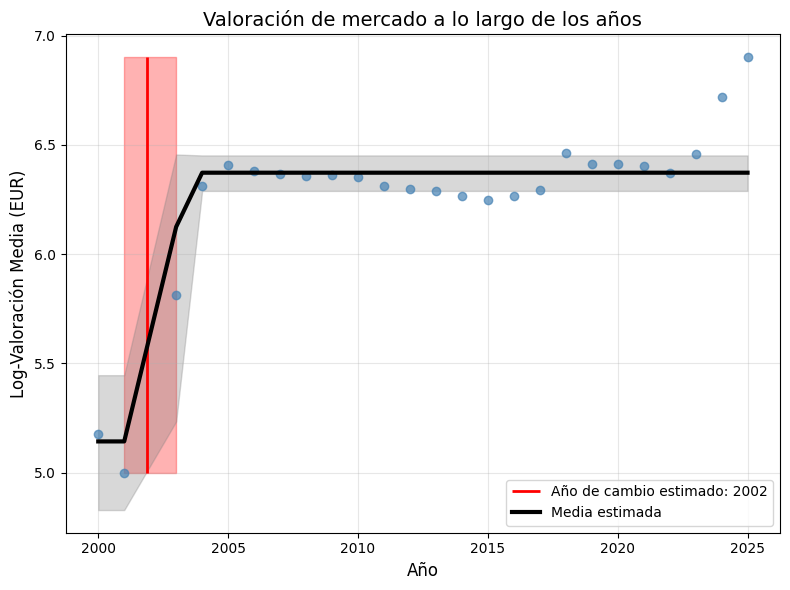

In [7]:
μ_mean = idata_valoraciones.posterior["μ"].mean(("chain", "draw"))
μ_hdi = az.hdi(idata_valoraciones.posterior["μ"].values)
ac_hdi = az.hdi(idata_valoraciones.posterior["ac"])["ac"]
ac_mean = float(idata_valoraciones.posterior["ac"].mean(("chain", "draw")).values)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df_valoracion_jugadores['year'], 
        df_valoracion_jugadores['log_market_value_in_eur'], 
        "o", color="steelblue", markersize=6, alpha=0.7)

# Línea vertical para el año de cambio estimado
ax.vlines(
    ac_mean,
    df_valoracion_jugadores['log_market_value_in_eur'].min(),
    df_valoracion_jugadores['log_market_value_in_eur'].max(),
    color="red",
    lw=2,
    label=f"Año de cambio estimado: {ac_mean:.0f}"
)

# Intervalo de credibilidad para el año de cambio
ax.fill_betweenx(
    [df_valoracion_jugadores['log_market_value_in_eur'].min(), 
     df_valoracion_jugadores['log_market_value_in_eur'].max()], 
    ac_hdi[0], ac_hdi[1], 
    alpha=0.3, color="red"
)

# Plotear la media estimada
ax.plot(df_valoracion_jugadores['year'], μ_mean, "k", lw=3, label="Media estimada")

# Intervalo de credibilidad para la media
ax.fill_between(df_valoracion_jugadores['year'], 
                μ_hdi[:, 0], μ_hdi[:, 1], 
                alpha=0.3, color="gray")

# Configuración del gráfico
ax.set_ylabel("Log-Valoración Media (EUR)", fontsize=12)
ax.set_xlabel("Año", fontsize=12)
ax.set_title("Valoración de mercado a lo largo de los años", fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

Podemos observar que el modelo si captó este efecto gradual de cambio **entre los años 2000 y 2005**. Además presentó un ajuste bastante bueno a los datos con una confianza aceptable.

Como conclusión se puede decir que obtuvimos un modelo que aporta algo a la discusión de la inflación de jugadores en el mundo del fútbol y que además logró captar información útil para posteriores análisis relacionados.